#  Chapter 7 Statistical foundations

##  7.1 Samples and population

In [55]:
import os
import warnings

In [56]:
dataset = "flights.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [57]:
import pandas as pd # data processing, CSV file I/O
import numpy as np

# read the dataset
flights=pd.read_csv(os.path.join(wd, dataset))

In [58]:
flights.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00


In [59]:
# "dest" column의 값이 "SFO"인 row만 filter
flights = flights[flights["dest"] == "SFO"]

In [60]:
flights.head(3)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
13,2013,1,1,558.0,600,-2.0,923.0,937,-14.0,UA,1124,N53441,EWR,SFO,361.0,2565,6,0,2013-01-01 06:00:00
26,2013,1,1,611.0,600,11.0,945.0,931,14.0,UA,303,N532UA,JFK,SFO,366.0,2586,6,0,2013-01-01 06:00:00
55,2013,1,1,655.0,700,-5.0,1037.0,1045,-8.0,DL,1865,N705TW,JFK,SFO,362.0,2586,7,0,2013-01-01 07:00:00


In [61]:
# "arr_delay" column의 값이 Null인 경우는 제거
print("Before dataframe shape: ", flights.shape)
flights = flights.dropna(subset=["arr_delay"])
print("Before dataframe shape: ", flights.shape)

Before dataframe shape:  (13331, 19)
Before dataframe shape:  (13173, 19)


In [62]:
#  pandas dataframe의 경우, 자체적으로 sample 함수를 가지고 있다.
sample = flights.sample(n = 25)

In [9]:
sample["arr_delay"].describe()

count    25.000000
mean     -2.240000
std      33.077283
min     -49.000000
25%     -22.000000
50%      -7.000000
75%      12.000000
max      75.000000
Name: arr_delay, dtype: float64

In [10]:
flights["arr_delay"].describe()

count    13173.000000
mean         2.672892
std         47.670642
min        -86.000000
25%        -23.000000
50%         -8.000000
75%         12.000000
max       1007.000000
Name: arr_delay, dtype: float64

In [11]:
sample["arr_delay"].quantile(0.98)

65.88

In [12]:
flights.loc[flights["arr_delay"] <= 90, "proportion"] = "TRUE"
flights.loc[flights["arr_delay"] > 90, "proportion"] = "FALSE"

In [13]:
flights["proportion"].value_counts(normalize=True)

TRUE     0.951947
FALSE    0.048053
Name: proportion, dtype: float64

## 7.2 Sample statistic

In [14]:
dataset = "flights.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [15]:
# read the dataset
flights=pd.read_csv(os.path.join(wd, dataset))

In [16]:
sample = flights.sample(n = 25)

In [17]:
sample["arr_delay"].mean()

9.36

In [18]:
data = {"mean": []}
for i in range(500):
    sample = flights.sample(n = 25)
    data["mean"].append(sample["arr_delay"].mean())
    
Trials = pd.DataFrame(data)

Trials.head(5)

,mean
0,47.666667
1,9.800000
2,5.080000
3,-0.800000
4,16.458333


In [19]:
# 2차원 Matrix인 DataFrame의 경우 describe() 함수를 쓰면, 아래와 같이 DataFrame 형태의 결과를 가진다.
# 이것이 윗부분(DataFrame의 특정 Column에 대해서 Describe를 했을 때)과 출력 결과 형태가 다른 것은
# DataFrame에서 특정 Column을 지정하면 DataFrame이 아닌 1차원 배열인 Series 형태가 되기 때문이다.
Trials.describe()

,mean
count,500.000000
mean,7.410531
std,8.758316
min,-11.125000
25%,0.937391
50%,6.573333
75%,12.730000
max,47.666667


In [20]:
# 신뢰구간의 경우, 수식 계산을 직접 해줘야 한다. 따로 함수가 있지는 않다.
C = pd.Series([1, -1])
print(Trials["mean"].mean() + 2 * Trials["mean"].std() * C)

0    24.927163
1   -10.106101
dtype: float64


In [21]:
data = {"mean": []}
for i in range(500):
    sample = flights.sample(n = 100)
    data["mean"].append(sample["arr_delay"].mean())
    
Trials_100 = pd.DataFrame(data)

Trials_100.head(5)

,mean
0,5.350000
1,4.816327
2,7.989362
3,10.606061
4,6.153061


In [105]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

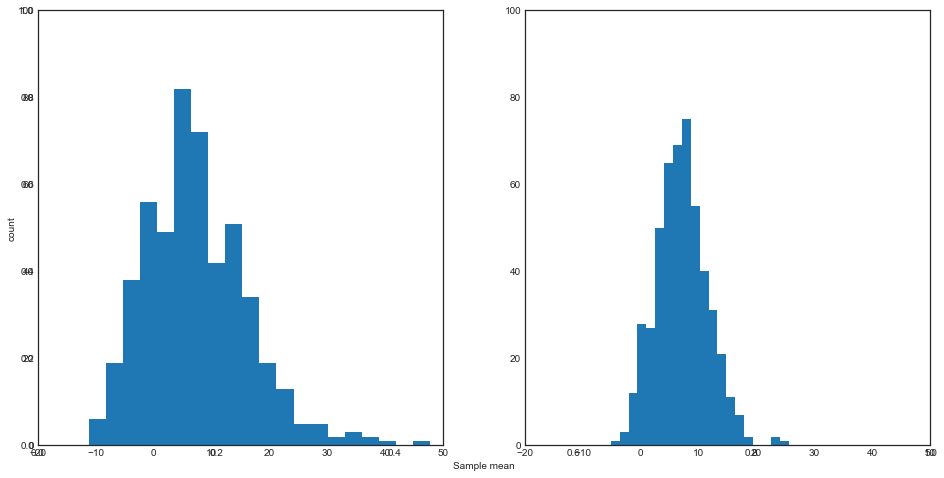

In [106]:
fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)
ax1 = fig.add_subplot(1, 2, 1)
ax1.hist(Trials["mean"], bins = 20)
ax1.set_xlim(-20, 50)
ax1.set_ylim(0, 100)

ax2 = fig.add_subplot(1, 2, 2)
ax2.hist(Trials_100["mean"], bins = 20)
ax2.set_xlim(-20, 50)
ax2.set_ylim(0, 100)

ax.set_xlabel("Sample mean")
ax.set_ylabel("count")
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_visible(False)

## 7.3 The bootstrap

In [107]:
dataset = "flights.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [108]:
# read the dataset
flights=pd.read_csv(os.path.join(wd, dataset))

In [109]:
# R 코드와 같이 replace parameter를 통해서 중복되어 sample을 뽑을 수 있다.
Small = flights.sample(n = 3, replace=True)

### 나머지 작업의 경우 중복

## 7.4 Outlier

In [110]:
# "arr_delay" column의 값이 420 이상인 row만 filter
flights_over_420 = flights[flights["arr_delay"] >= 420]

In [111]:
flights_over_420[["month", "day", "dep_delay", "arr_delay", "carrier"]].head()

,month,day,dep_delay,arr_delay,carrier
151,1,1,853.0,851.0,MQ
834,1,1,379.0,456.0,EV
7072,1,9,1301.0,1272.0,HA
8239,1,10,1126.0,1109.0,MQ
11063,1,13,599.0,612.0,DL


In [112]:
flights_over_420.shape

(104, 19)

In [113]:
flights_over_60 = flights[flights["arr_delay"] > 60]
flights_under_60 = flights[flights["arr_delay"] <= 60]

flights_over_60["month"].value_counts(sort=False)

result = {"TRUE": flights_over_60["month"].value_counts(sort=False),
         "FALSE": flights_under_60["month"].value_counts(sort=False)}

pd.DataFrame(result)

,TRUE,FALSE
1,1862,24536
2,1627,21984
3,2336,25566
4,2798,24766
5,2236,25892
6,3845,23230
7,4092,24201
8,2401,26355
9,1285,25725
10,1290,27328


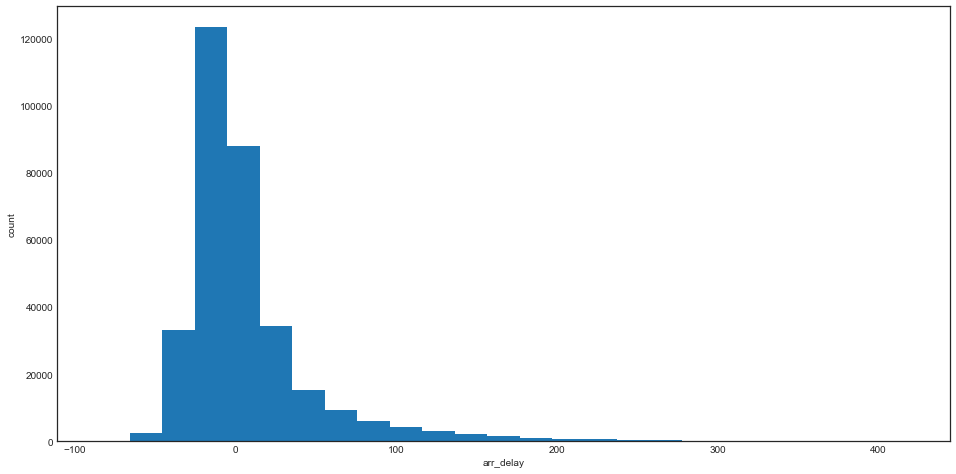

In [114]:
flights_under_420 = flights[flights["arr_delay"] < 420]

plt.figure(figsize=(16, 8))
plt.hist(flights_under_420["arr_delay"], bins = 25)
plt.xlabel("arr_delay")
plt.ylabel("count")
plt.show()

## 7.5	Statistical models: Explaining variation

In [115]:
flights["hour"].value_counts(sort=False)

1         1
5      1953
6     25951
7     22821
8     27242
9     20312
10    16708
11    16033
12    18181
13    19956
14    21706
15    23888
16    23002
17    24426
18    21783
19    21441
20    16739
21    10933
22     2639
23     1061
Name: hour, dtype: int64

In [116]:
import seaborn as sns

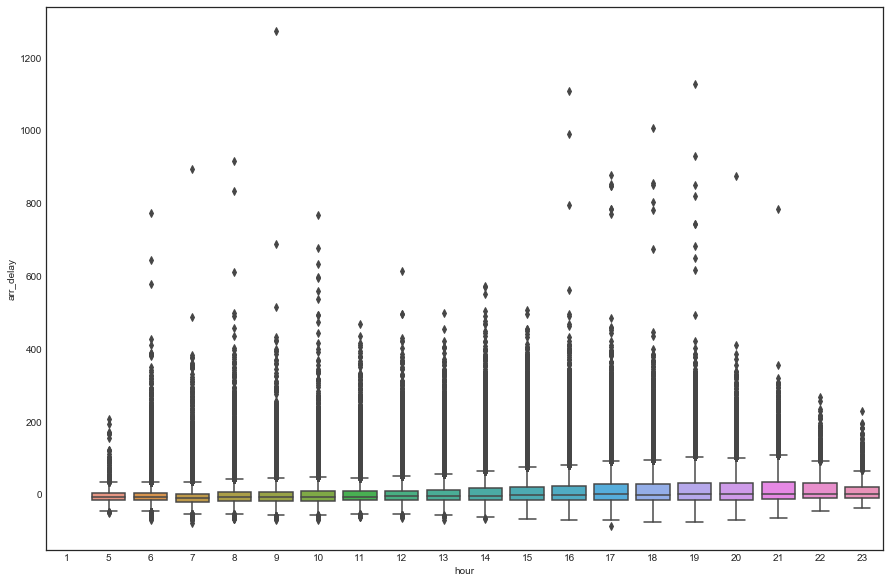

In [117]:
plt.figure(figsize = (15,10))
sns.boxplot(x = "hour", y = "arr_delay",data= flights)
plt.show()

In [119]:
!conda install statsmodels

Solving environment: ...working... done

# All requested packages already installed.



In [125]:
import numpy as np
import statsmodels.api as sm

In [127]:
X = sm.add_constant(flights["hour"])
Y = flights["arr_delay"]

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

# 상관관계가 없어서 이런 결과가 나오는 듯 하다.

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 13 Nov 2019   Prob (F-statistic):                nan
Time:                        00:00:29   Log-Likelihood:                    nan
No. Observations:              336776   AIC:                               nan
Df Residuals:                  336774   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

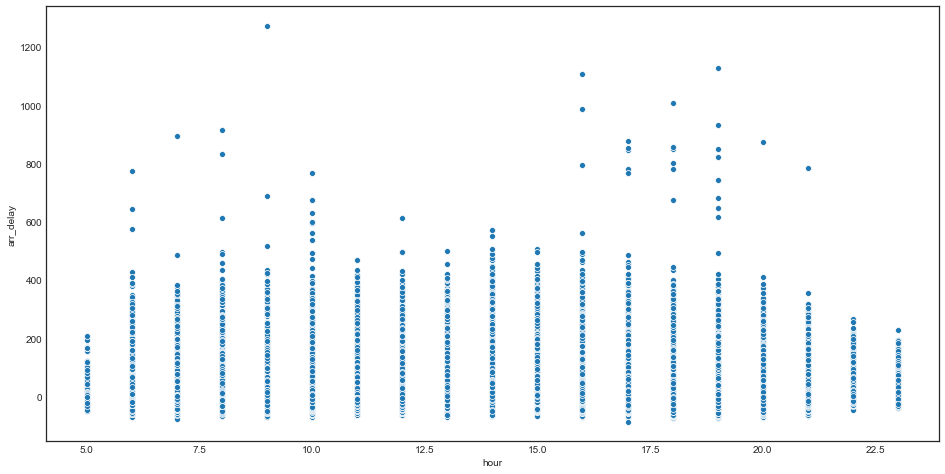

In [130]:
plt.figure(figsize=(16, 8)) 
g = sns.scatterplot(x="hour", y="arr_delay", data=flights)

# 왜 교재에서 의미있는 결과가 나오는지 모르겠다.

### 이후 교재에서 categorical feature에 대해서  Regression을 진행하는데,
- R과 같이 자동으로 Categorical feature에 대해서 regression하는 방법은 존재하지 않음.
- 따라서, One-hot encoding을 하거나, 값의 경향성을 보고 값을 대입해주어야 한다.

In [140]:
# origin에 따른 arr_delay 값의 평균을 살펴본다.
flights[["origin", "arr_delay"]].groupby(["origin"], as_index=False).mean()

,origin,arr_delay
0,EWR,9.107055
1,JFK,5.551481
2,LGA,5.783488


In [142]:
# origin 값을 int형으로 바꿔준다. 순서는 arr_delay에 근거한다.
flights["origin"] = flights["origin"].map( {"EWR": 0, "LGA": 1, "JFK": 2} ).astype(int)

In [145]:
flights[["carrier", "arr_delay"]].groupby(["carrier"], as_index=False).mean().sort_values(by="arr_delay", ascending=False)

,carrier,arr_delay
6,F9,21.920705
7,FL,20.115906
5,EV,15.796431
15,YV,15.556985
10,OO,11.931034
9,MQ,10.774733
14,WN,9.649120
3,B6,9.457973
0,9E,7.379669
11,UA,3.558011


In [146]:
carrier_dict = {"F9": 0, "FL": 1, "EV": 2, "YV": 3, "OO": 4, "MQ": 5, "WN": 6, "B6": 7, "9E": 8, "UA": 9,
       "US": 10, "VX": 11, "DL": 12, "AA": 13, "HA": 14, "AS": 15}

flights["carrier"] = flights["carrier"].map( carrier_dict ).astype(int)

In [147]:
X = sm.add_constant(flights[["hour", "origin", "carrier"]])
Y = flights["arr_delay"]

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

# 하지만 결과는 나오지 않았다...

                            OLS Regression Results                            
Dep. Variable:              arr_delay   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Wed, 13 Nov 2019   Prob (F-statistic):                nan
Time:                        00:34:17   Log-Likelihood:                    nan
No. Observations:              336776   AIC:                               nan
Df Residuals:                  336772   BIC:                               nan
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

C:\Users\ddacc\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\ddacc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ddacc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ddacc\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)
C:\Users\ddacc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1429: RuntimeWarning: invalid value encountered in sign
  term2 = np.sign(denom) * np.where(denom == 0.0, np.nan,


In [149]:
# 혹시나 이상이 있나 확인하기 위해, StatsModels Docs의 예시를 가져와보았다.

spector_data = sm.datasets.spector.load(as_pandas=False)

spector_data.exog = sm.add_constant(spector_data.exog, prepend=False)

# Fit and summarize OLS model
mod = sm.OLS(spector_data.endog, spector_data.exog)

res = mod.fit()

print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.353
Method:                 Least Squares   F-statistic:                     6.646
Date:                Wed, 13 Nov 2019   Prob (F-statistic):            0.00157
Time:                        00:36:13   Log-Likelihood:                -12.978
No. Observations:                  32   AIC:                             33.96
Df Residuals:                      28   BIC:                             39.82
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.4639      0.162      2.864      0.0

## 7.6	Confounding and accounting for other factors


In [152]:
dataset = "SAT_2010.csv"
# currnet file directory
wd = os.getcwd()
# check the dataset is in the directory
if not dataset in os.listdir(wd):
    warnings.warn("There is no input data", UserWarning)

In [153]:
# read the dataset
SAT_2010 = pd.read_csv(os.path.join(wd, dataset))

Text(-1.5750000000000028, 0.5, 'Average total score on the SAT')

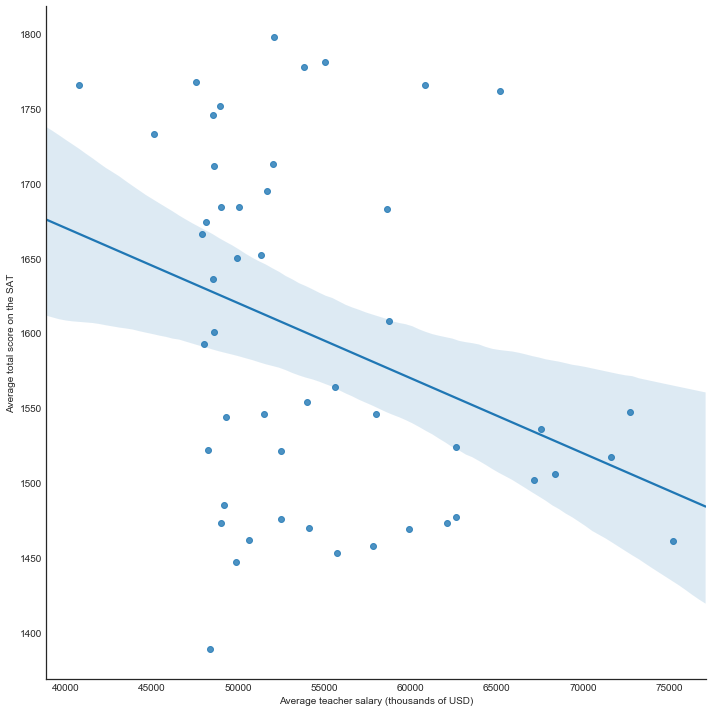

In [159]:
g = sns.lmplot(x="salary", y="total", data=SAT_2010, size=10)
plt.xlabel("Average teacher salary (thousands of USD)")
plt.ylabel("Average total score on the SAT")

In [160]:
X = sm.add_constant(SAT_2010["salary"])
Y = SAT_2010["total"]

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.111
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     6.008
Date:                Wed, 13 Nov 2019   Prob (F-statistic):             0.0179
Time:                        00:51:59   Log-Likelihood:                -305.47
No. Observations:                  50   AIC:                             614.9
Df Residuals:                      48   BIC:                             618.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1871.1037    113.141     16.538      0.0

In [161]:
SAT_2010["sat_pct"].describe()

count    50.000000
mean     38.520000
std      31.991223
min       3.000000
25%       6.000000
50%      27.000000
75%      68.000000
max      93.000000
Name: sat_pct, dtype: float64

In [162]:
SAT_2010.loc[SAT_2010["sat_pct"] <= 27, "SAT_grp"] = "Low"
SAT_2010.loc[SAT_2010["sat_pct"] > 27, "SAT_grp"] = "High"

Text(23.688298611111115, 0.5, 'Average total score on the SAT')

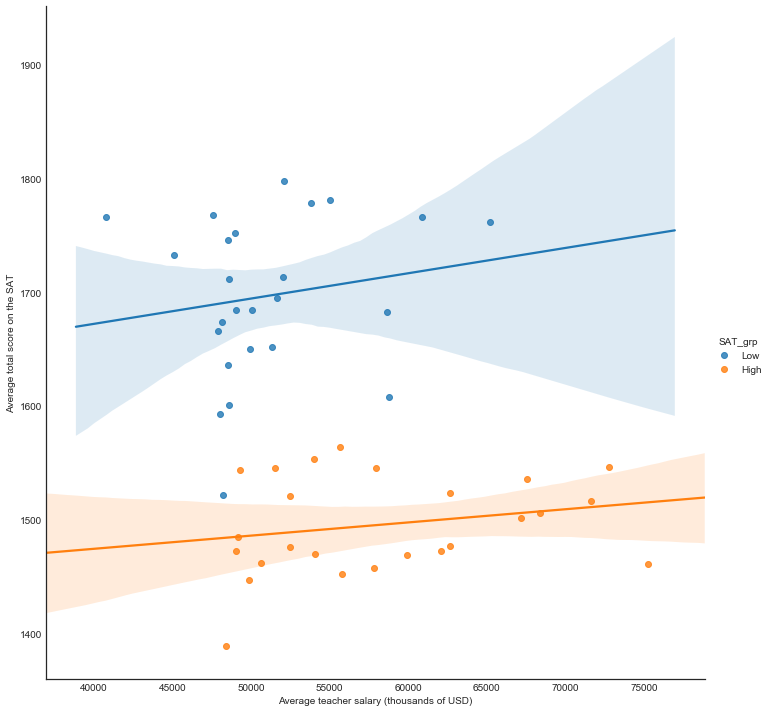

In [164]:
g = sns.lmplot(x="salary", y="total", hue="SAT_grp", data=SAT_2010, size=10)
plt.xlabel("Average teacher salary (thousands of USD)")
plt.ylabel("Average total score on the SAT")

In [167]:
X = sm.add_constant(SAT_2010[SAT_2010["SAT_grp"] == "Low"]["salary"])
Y = SAT_2010[SAT_2010["SAT_grp"] == "Low"]["total"]

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.6539
Date:                Wed, 13 Nov 2019   Prob (F-statistic):              0.427
Time:                        00:56:31   Log-Likelihood:                -140.91
No. Observations:                  25   AIC:                             285.8
Df Residuals:                      23   BIC:                             288.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1583.2656    141.258     11.208      0.0

In [168]:
X = sm.add_constant(SAT_2010[SAT_2010["SAT_grp"] == "High"]["salary"])
Y = SAT_2010[SAT_2010["SAT_grp"] == "High"]["total"]

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.049
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.197
Date:                Wed, 13 Nov 2019   Prob (F-statistic):              0.285
Time:                        00:56:44   Log-Likelihood:                -128.35
No. Observations:                  25   AIC:                             260.7
Df Residuals:                      23   BIC:                             263.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1428.3758     62.405     22.889      0.0

In [169]:
# categorical feature는 변환을 해주어야 한다.
SAT_2010["SAT_grp"] = SAT_2010["SAT_grp"].map( {"Low": 0, "High": 1} ).astype(int)

In [170]:
X = sm.add_constant(SAT_2010[["salary", "SAT_grp"]])
Y = SAT_2010["total"]

model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  total   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     75.89
Date:                Wed, 13 Nov 2019   Prob (F-statistic):           1.92e-15
Time:                        00:58:29   Log-Likelihood:                -272.37
No. Observations:                  50   AIC:                             550.7
Df Residuals:                      47   BIC:                             556.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1621.9818     62.902     25.786      0.0